# This Project serves as the last portfolio project as part of the [Codecademy](https://www.codecademy.com/career-journey/data-scientist-ml) data science: machine learning specialist career path and aims to independently analzye the data from a source called "OKCupid"
--------------------------------
### "The purpose of this project is to practice formulating questions and implementing machine learning techniques to answer those questions. However, the questions you ask and how you answer them are entirely up to you."


## More about the idea:
   > `from the direct Codecademy source` : In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance. In this portfolio project, you will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.


Althought the dataset revolves around the concept of dating I want to re-direct the vector of attention to aspects that fit me as a person and my beliefs thus shifting it into "Recommend a Peer". The usual steps including Data Preprocessing, Exploratory Data Analysis, Machine Learning Model Selection, Evaluation, and Tuning, will be followed. The `Scope` ultimately is to showcase what I learnt throughtout the careerpath. I also plan to refactor the code to accomodate the concept of pipelines and explore deploying it for a more practical feel further down the line.

To be more specific this project, utilizes three machine learning models in order to achieve different goals:

    > Predicting a feature about a user based on data available
    > Grouping users in order to recognize patterns
    > A recommender model that recommendes a peer

## Current Planned Progression:

    1. Exploring the dataset
        1a. Basic Information
        1b. Data Types
        1c. Addressing features (Isolating and Dropping features) 
    2. Data Preprocessing
        2a. Nulls
        2b. Outliers
        2c. Formatting Issues
        .. extra
    3. Exploratory Data Analysis
        3a. Understanding the Age distribution
        3b. Eating habits (relation with body type?)
        3c. Usage of Prohibited materials (affects on health)
        3d. Frequency of Education (across ages) - (edu vs income)
        3e. Frequency of Jobs - (Jobs vs incomes) - (Max vs Min Jobs)
        3f. Frequency and Proportions of Locations (Average income and height per location) - (Highest Frequency Job in each Location)
        3g. Activity on the site - (Activity per location)
        3h. Is there an association between having pet and a child? (exploring different associations)
        ... exploring hypothesis tests 
        ... exploring exploring further associations 
        ... exploring feature engineering before feeding them into the machine learning models

    4. Machine Learning Model
        I plan on using 3 models to predict:
            >  If the use would be a smoker or not (Supervised)
            >  Group Users in order to discover patterns (Unsupervised)
            >  Recommend a user based on common attributed (Supervised)

        ... a very basic start that would lead to evaluation then tuning later on.

### As Always importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Exploring the Dataset

In [2]:
Individuals = pd.read_csv("profiles.csv")
Ind,test_set = train_test_split(Individuals,train_size = 0.85,test_size=0.15,random_state = 42)

In [3]:
Ind.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
48937,24,NaN,NaN,socially,NaN,graduated from college/university,NaN,i just got home from teaching english in manta...,NaN,NaN,...,"oakland, california",doesn&rsquo;t have kids,straight,NaN,NaN,m,pisces but it doesn&rsquo;t matter,NaN,"english, spanish",single
55273,56,thin,mostly vegetarian,socially,never,graduated from masters program,"i am fun loving, professional, open minded and...",i am enjoying life with friends and family. i ...,communication; instigator; i make a mean pr ch...,"my smile, kindness and younger than my age looks.",...,"san rafael, california",NaN,straight,likes dogs and likes cats,other but not too serious about it,f,aries,no,"english (fluently), spanish (fluently), italia...",single
5823,26,average,NaN,often,often,graduated from college/university,"i'm a really nerdy, really nice guy, working a...",trying not to get burned out as an engineer be...,"computers, memorizing song lyrics, and keeping...","that i'm just shy, not anti-social. (you can t...",...,"palo alto, california",NaN,straight,likes dogs and likes cats,atheism and somewhat serious about it,m,taurus but it doesn&rsquo;t matter,sometimes,english (fluently),single
7457,25,NaN,mostly anything,NaN,NaN,working on law school,born and raised in maine but knew immediately ...,meandering through law school.,making music playlists... i take a lot of prid...,i only like to answer self-congratulatory ques...,...,"san francisco, california",NaN,gay,NaN,agnosticism but not too serious about it,m,aquarius but it doesn&rsquo;t matter,NaN,english,single
34435,25,jacked,vegan,desperately,sometimes,NaN,"i'm a queer, vegan, ftm trans guy. holla!",being a deadbeat,giggling. making out!,tomatillo.,...,"san francisco, california",NaN,bisexual,likes dogs and likes cats,NaN,m,taurus,no,english,single


In [4]:
Ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50954 entries, 48937 to 56422
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          50954 non-null  int64  
 1   body_type    46470 non-null  object 
 2   diet         30268 non-null  object 
 3   drinks       48436 non-null  object 
 4   drugs        39052 non-null  object 
 5   education    45342 non-null  object 
 6   essay0       46286 non-null  object 
 7   essay1       44515 non-null  object 
 8   essay2       42761 non-null  object 
 9   essay3       41189 non-null  object 
 10  essay4       41963 non-null  object 
 11  essay5       41664 non-null  object 
 12  essay6       39218 non-null  object 
 13  essay7       40339 non-null  object 
 14  essay8       34639 non-null  object 
 15  essay9       40222 non-null  object 
 16  ethnicity    46128 non-null  object 
 17  height       50952 non-null  float64
 18  income       50954 non-null  int64  
 19  job  

Features' Dtypes are within reason but would like to inspect income to understand the values that are present inside.

In [5]:
Ind.income.unique()

array([     -1,   70000,   40000,   80000,   60000,   20000, 1000000,
        150000,  100000,   30000,  250000,   50000,  500000], dtype=int64)

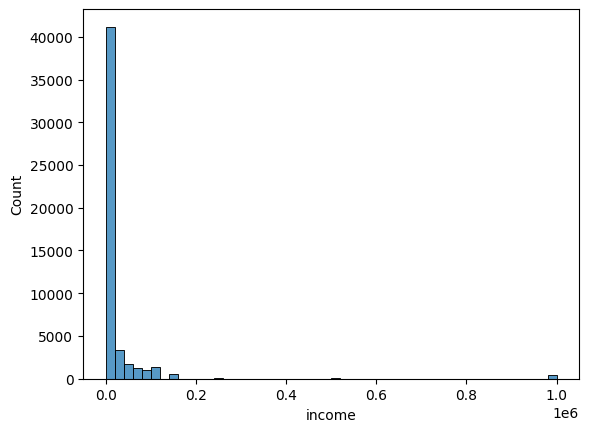

<Figure size 640x480 with 0 Axes>

In [6]:
sns.histplot(Ind.income, bins=50)
plt.plot()
plt.show()
plt.clf()

## Pandas recorded int64 for this feature as there are no values with decimals. The other intriguing thing is the appearane of a `-1` in the data indicating a probable missing value that should be either imputed or removed

## A very effective way is to look at a description

In [7]:
Ind.describe()

,age,height,income
count,50954.000000,50952.000000,50954.000000
mean,32.318974,68.292609,20154.822487
std,9.440987,4.001184,97933.841657
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


## Yikes a very minimal table yet lengthy description. The income feature confirms what we looked at there are many `-1` values probably indicating a missing value and a whooping `1000000.000000` value that could be an outlier. The height feature has a minimum of `1` which does not make any sense so that feature should be inspected as well.

In [8]:
Ind.height.unique()

array([70., 66., 71., 67., 76., 64., 68., 69., 74., 65., 72., 61., 73.,
       59., 75., 63., 62., 60., 77., 78., 48., 50., 55., 57.,  8., 51.,
        1., 81., 79., 82., 58., 56., 52., 80., 84., 94., 83., 43., 85.,
       95., nan, 36., 53., 88.,  3., 49., 54., 47.,  9., 91., 89., 92.,
       87., 42., 37.,  6.,  4., 90., 86., 26.])

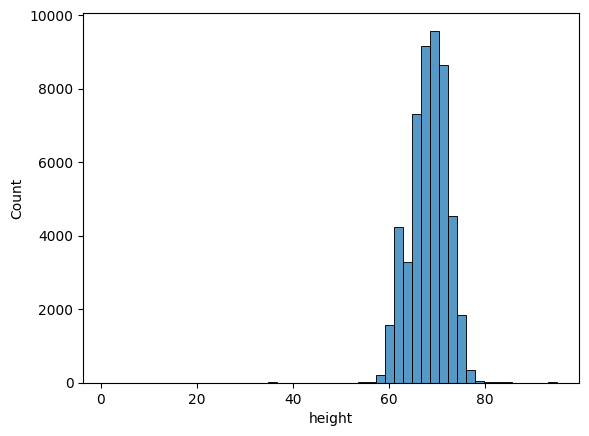

<Figure size 640x480 with 0 Axes>

In [9]:
sns.histplot(Ind.height, bins=50) 
plt.plot()
plt.show()
plt.clf()

## As seen by both the output of the .unique() method and the histogram plot there are values that do not make sense like the `1.` we saw that needs to be taken care of during pre-processing.

# Regarding features

> I plan to Isolate all `essay` variables in one dataframe until further down the line as NLP will be more involved.
    
> I do not plan on using the `orientation`, `religion`, 'status`,`sign` features. 

In [10]:
essays = Ind[Ind.filter(regex = "essay[0-9]").columns]
essays.columns

Index(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6',
       'essay7', 'essay8', 'essay9'],
      dtype='object')

In [11]:
Ind.drop(Ind.filter(regex = "essay[0-9]").columns, axis=1,inplace=True)

In [12]:
Ind.drop(['orientation','religion','status','sign'],axis=1,inplace=True)

In [13]:
Ind.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'last_online', 'location', 'offspring',
       'pets', 'sex', 'smokes', 'speaks'],
      dtype='object')

In [14]:
Ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50954 entries, 48937 to 56422
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          50954 non-null  int64  
 1   body_type    46470 non-null  object 
 2   diet         30268 non-null  object 
 3   drinks       48436 non-null  object 
 4   drugs        39052 non-null  object 
 5   education    45342 non-null  object 
 6   ethnicity    46128 non-null  object 
 7   height       50952 non-null  float64
 8   income       50954 non-null  int64  
 9   job          44029 non-null  object 
 10  last_online  50954 non-null  object 
 11  location     50954 non-null  object 
 12  offspring    20745 non-null  object 
 13  pets         34032 non-null  object 
 14  sex          50954 non-null  object 
 15  smokes       46285 non-null  object 
 16  speaks       50906 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 7.0+ MB


# Data Preprocessing

## Any missing values?
### In addition to values that could be indicative of a missing/incorrect value in the `income` and `height` fields. It is needed to address NaN (null) values in the dataset

In [15]:
Ind.isna().any()

age            False
body_type       True
diet            True
drinks          True
drugs           True
education       True
ethnicity       True
height          True
income         False
job             True
last_online    False
location       False
offspring       True
pets            True
sex            False
smokes          True
speaks          True
dtype: bool

In [16]:
Ind.isna().sum()

age                0
body_type       4484
diet           20686
drinks          2518
drugs          11902
education       5612
ethnicity       4826
height             2
income             0
job             6925
last_online        0
location           0
offspring      30209
pets           16922
sex                0
smokes          4669
speaks            48
dtype: int64

### In terms of categorical features, I will simply replace all null values with an 'Not Shared' to avoid potentially introducing high bias into the dataset. For `height` (A numeric feature) I will remove these observations as they very low in number.

In [17]:
categorical_cols = list(Ind.select_dtypes(include = 'object').columns)
numeric_cols = list(Ind.select_dtypes(include = ['int64','float64']).columns)
Ind[categorical_cols] = Ind[categorical_cols].fillna('Not Shared')

In [18]:
categorical_cols

['body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'ethnicity',
 'job',
 'last_online',
 'location',
 'offspring',
 'pets',
 'sex',
 'smokes',
 'speaks']

In [19]:
numeric_cols

['age', 'height', 'income']

In [20]:
Ind.dropna(subset=['height'],axis=0,inplace=True)

In [21]:
Ind.isna().any()

age            False
body_type      False
diet           False
drinks         False
drugs          False
education      False
ethnicity      False
height         False
income         False
job            False
last_online    False
location       False
offspring      False
pets           False
sex            False
smokes         False
speaks         False
dtype: bool

### Additionaly I want to check on both `height` and `income` values that were viewed before.

In [22]:
Ind.height.value_counts().sort_index()

height
1.0        1
3.0        1
4.0        1
6.0        1
8.0        1
9.0        1
26.0       1
36.0      11
37.0       2
42.0       1
43.0       2
47.0       1
48.0       2
49.0       1
50.0       2
51.0       1
52.0       1
53.0       5
54.0       2
55.0       6
56.0       8
57.0      14
58.0      37
59.0     182
60.0     662
61.0     920
62.0    1889
63.0    2347
64.0    3296
65.0    3255
66.0    4055
67.0    4551
68.0    4607
69.0    4426
70.0    5153
71.0    4105
72.0    4554
73.0    2379
74.0    2150
75.0    1180
76.0     653
77.0     240
78.0     109
79.0      48
80.0      23
81.0       9
82.0      11
83.0      11
84.0       6
85.0       1
86.0       1
87.0       1
88.0       1
89.0       1
90.0       1
91.0       3
92.0       1
94.0       3
95.0      15
Name: count, dtype: int64

### I am under the assumption that very low heights (in inches) are incorrect. I will conclude all heights under 48 inches as erroneous and then inspect distributions later on.   (Needs more explaining)

In [23]:
Ind = Ind[Ind.height >= 48.0]

In [24]:
# Once more re-inspecting the unqiue values in income
Ind.income.unique()

array([     -1,   70000,   40000,   80000,   60000,   20000, 1000000,
        150000,  100000,   30000,  250000,   50000,  500000], dtype=int64)

In [25]:
Ind.income.value_counts().sort_index()

income
-1          41156
 20000       2492
 30000        893
 40000        853
 50000        822
 60000        637
 70000        584
 80000        963
 100000      1388
 150000       528
 250000       125
 500000        41
 1000000      446
Name: count, dtype: int64

### A lot of -1 values that's for sure. This leads me to believe that this data is not missing at random (MNAR) and many do not like to share important aspects like their income. I will leave it be moving forward.

You could inspect the following [BLOG](https://medium.com/analytics-vidhya/different-types-of-missing-data-59c87c046bf7) for more information on missing types of data. 

# Are there any apparent outliers?

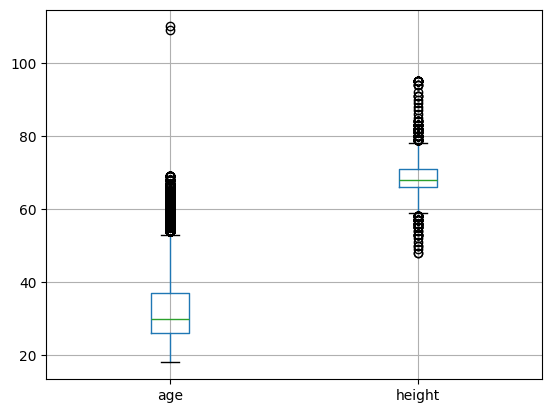

<Figure size 640x480 with 0 Axes>

In [26]:
Ind[[col for col in numeric_cols if col != 'income']].boxplot()
plt.show()
plt.clf()

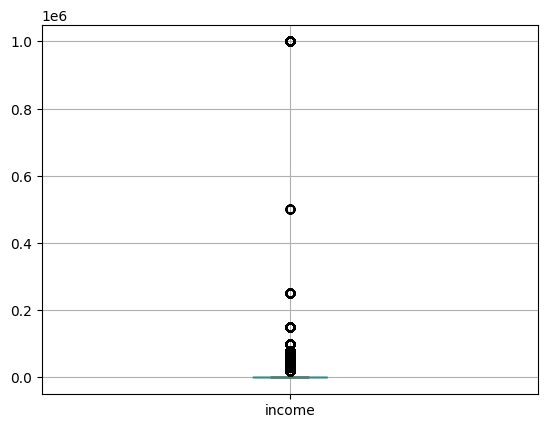

<Figure size 640x480 with 0 Axes>

In [27]:
Ind[['income']].boxplot()
plt.show()
plt.clf()

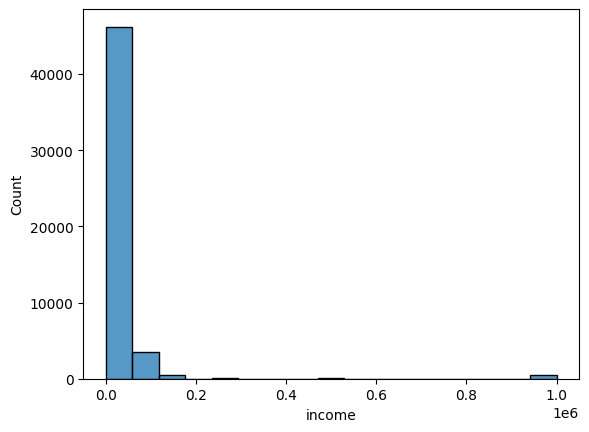

<Figure size 640x480 with 0 Axes>

In [28]:
sns.histplot(Ind.income)
plt.show()
plt.clf()

#### Boxplots and Hisograms can help you eye-catch outliers. I separated `income` from both `age` and `height` as it is in a higher scale (A this early point, we must consider scaling them later on is important)

#### `age` and `income` showcase values that appear to be extreme thus the need to deal with them. A simple way to is to clip those two features then observe the results for further actions. (I may bin income as many values are -1 that indicate that values are not shared)
####  Within the `heights` boxplot, the values (indicated  by black circles) could represent an actual person that is very tall/short so I won't consider limiting this feature further. 

In [29]:
Ind.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,sex,smokes,speaks
48937,24,Not Shared,Not Shared,socially,Not Shared,graduated from college/university,other,70.0,-1,Not Shared,2012-06-26-08-22,"oakland, california",doesn&rsquo;t have kids,Not Shared,m,Not Shared,"english, spanish"
55273,56,thin,mostly vegetarian,socially,never,graduated from masters program,hispanic / latin,66.0,-1,other,2012-07-01-00-36,"san rafael, california",Not Shared,likes dogs and likes cats,f,no,"english (fluently), spanish (fluently), italia..."
5823,26,average,Not Shared,often,often,graduated from college/university,white,71.0,-1,computer / hardware / software,2012-06-20-13-53,"palo alto, california",Not Shared,likes dogs and likes cats,m,sometimes,english (fluently)
7457,25,Not Shared,mostly anything,Not Shared,Not Shared,working on law school,white,71.0,-1,student,2012-05-20-18-37,"san francisco, california",Not Shared,Not Shared,m,Not Shared,english
34435,25,jacked,vegan,desperately,sometimes,Not Shared,other,67.0,-1,retired,2012-06-17-12-03,"san francisco, california",Not Shared,likes dogs and likes cats,m,no,english


In [30]:
def remove_outliers(df,cols):
    feature_bounds = {}
    for feature in cols:
        Q1 = np.percentile(df[feature],25)
        Q3 = np.percentile(df[feature],75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.8 * IQR 
        upper_bound = Q3 + 1.8 * IQR
        df[feature] = np.where(df[feature].notna(), 
                               np.clip(df[feature], lower_bound, upper_bound), 
                               df[feature])
        feature_bounds[feature] = (lower_bound,upper_bound)
    return feature_bounds

In [31]:
feature_bounds = remove_outliers(Ind,['age'])
feature_bounds

{'age': (6.199999999999999, 56.8)}

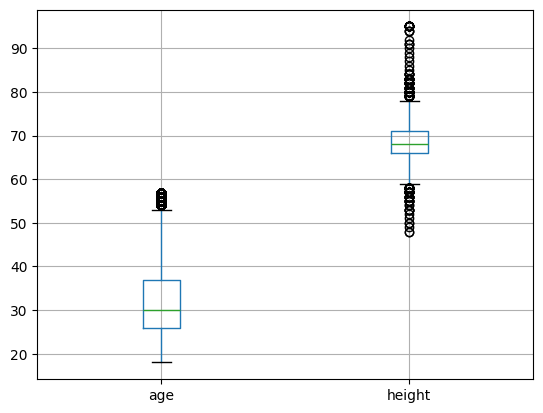

<Figure size 640x480 with 0 Axes>

In [32]:
Ind[[col for col in numeric_cols if col != 'income']].boxplot()
plt.show()
plt.clf()

In [33]:
def bin_income(df):
    df['income_category'] = df.income.apply(lambda x: np.nan if x == -1 else x)

    bins = [0, 50000, 100000, 500000, float(np.inf)]
    labels = ['$0-$50k', '$50k-$100k', '$100k-$500k', '$500k+']

    df['income_category'] = pd.cut(
    df['income'], 
    bins=bins,
    labels=labels,
    right=False)

    df['income_category'] = df['income_category'].astype('object').fillna('Not Shared')

In [34]:
bin_income(Ind)

In [35]:
Ind.income_category.unique()

array(['Not Shared', '$50k-$100k', '$0-$50k', '$500k+', '$100k-$500k'],
      dtype=object)

In [36]:
indices = Ind.income_category.value_counts().index

In [37]:
values = Ind.income_category.value_counts().values

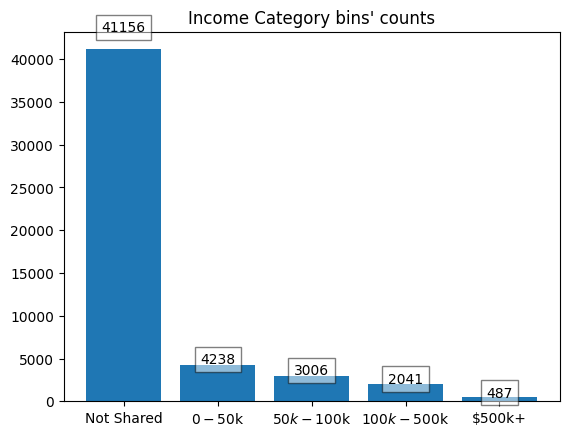

<Figure size 640x480 with 0 Axes>

In [38]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]*1.05,y[i],ha = 'center',bbox = dict(facecolor = 'white', alpha =.5)) # https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
                                                                                           # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html
plt.bar(x=indices,height=values)
addlabels(x=indices,y=values)
plt.title("Income Category bins' counts")
plt.show()
plt.clf()